In [1]:
!wget https://www.spataru.at/students/course_files/week4/loan.csv

--2024-11-26 12:51:32--  https://www.spataru.at/students/course_files/week4/loan.csv
Resolving www.spataru.at (www.spataru.at)... 81.19.159.92
Connecting to www.spataru.at (www.spataru.at)|81.19.159.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38013 (37K) [text/csv]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  37.12K  --.-KB/s    in 0.1s    

2024-11-26 12:51:33 (363 KB/s) - ‘loan.csv’ saved [38013/38013]



In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv("loan.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [6]:
df.shape

(614, 13)

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df = df.drop_duplicates(subset="Loan_ID")

In [9]:
df.shape

(614, 13)

In [10]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [11]:
imp = SimpleImputer(strategy="most_frequent")

In [12]:
df[df.columns] = imp.fit_transform(df)

In [13]:
df = df.drop(labels=["Loan_ID","Gender","Married", "Education"], axis=1)

In [14]:
df.Dependents.value_counts()

,count
Dependents,
0,360
1,102
2,101
3+,51


In [15]:
df.Dependents.astype("category").values

['0', '1', '0', '0', '0', ..., '0', '3+', '1', '2', '0']
Length: 614
Categories (4, object): ['0', '1', '2', '3+']

In [16]:
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
category = ["Dependents", "Self_Employed","Credit_History", "Property_Area", "Loan_Status"]

In [18]:
for c in category:
  df[c] = df[c].astype("category")

In [19]:
px.histogram(df, x="ApplicantIncome", color="Loan_Status")

In [20]:
px.scatter(df, x="ApplicantIncome", y="LoanAmount", color="Loan_Status")

In [21]:
df.columns

Index(['Dependents', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [22]:
df[df.Credit_History == "Y"].Credit_History.value_counts()

,count
Credit_History,
0.0,0
1.0,0


In [23]:
df[df.Credit_History == "N"].Credit_History.value_counts()

,count
Credit_History,
0.0,0
1.0,0


In [24]:
df.columns

Index(['Dependents', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [25]:
px.histogram(df, x="Property_Area", color="Loan_Status")

In [26]:
px.histogram(df[df.Property_Area=="Urban"], x="LoanAmount",  color="Loan_Status")

In [27]:
df[df.Credit_History == 0].Loan_Status.value_counts(True)

,proportion
Loan_Status,
N,0.921348
Y,0.078652


In [28]:
df[df.Credit_History == 1].Loan_Status.value_counts(True)

,proportion
Loan_Status,
Y,0.790476
N,0.209524


In [29]:
px.violin(df, x="Property_Area", y="LoanAmount", color="Loan_Status")

In [30]:
df.columns

Index(['Dependents', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [31]:
px.histogram(df, x="CoapplicantIncome", color="Loan_Status")

In [32]:
df[df.CoapplicantIncome > 0].Loan_Status.value_counts(True)

,proportion
Loan_Status,
Y,0.718475
N,0.281525


In [33]:
df[df.CoapplicantIncome == 0].Loan_Status.value_counts(True)

,proportion
Loan_Status,
Y,0.648352
N,0.351648


In [34]:
df["isntalone"] =df.CoapplicantIncome == 0

In [35]:
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,isntalone
0,0,No,5849,0.0,120.0,360.0,1.0,Urban,Y,True
1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,False
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,True
3,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,False
4,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,True


# Split Input and Output

In [36]:
y = df[["Loan_Status"]]

In [37]:
df["ApplicantIncome"] = df.ApplicantIncome.astype("int")

In [38]:
df.CoapplicantIncome = df.CoapplicantIncome.astype("int")
df.LoanAmount =df.LoanAmount.astype("int")
df.Loan_Amount_Term = df.Loan_Amount_Term.astype("int")

In [39]:
X = df.drop("Loan_Status", axis=1)

In [40]:
X = pd.get_dummies(X, drop_first=True)

In [41]:
y = pd.get_dummies(y,drop_first=True)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35, random_state=42)

# Decision Tree

In [136]:
clf = DecisionTreeClassifier(max_depth=1)

In [137]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[9] <= 0.5\ngini = 0.41\nsamples = 399\nvalue = [115, 284]'),
 Text(0.25, 0.25, 'gini = 0.174\nsamples = 52\nvalue = [47, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.315\nsamples = 347\nvalue = [68, 279]'),
 Text(0.625, 0.5, '  False')]

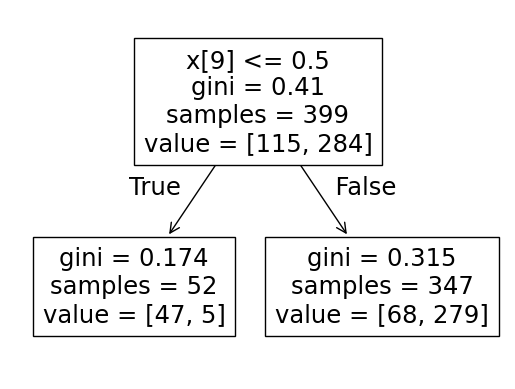

In [138]:
tree.plot_tree(clf)

In [140]:
y_pred =clf.predict(X_test)

In [141]:
accuracy_score(y_test, y_pred)

0.7953488372093023

# Evaluation

# K-Folds Cross Validation